In [1]:
import getAllData as gd
import numpy as np
import pandas as pd
import random
import json
import re

from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.util import mark_negation

In [2]:
data = pd.read_csv('merged.csv', index_col=0)
token = RegexpTokenizer(r'[a-zA-Z0-9]+').tokenize

In [3]:
bow_tfidf = gd.tfidf(data, token, 'tfidf.txt')

In [4]:
#data2 = pd.read_csv('bow_filtered_stemmed_tfidf.txt', sep=',')
data2 = pd.read_csv('tfidf.txt', sep=',')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(bow_tfidf, data['Rating'], test_size=0.2, random_state=1) # Note test is never used!!
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [8]:
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
predict = clf.predict(X_val)
accuracy_score = metrics.accuracy_score(predict, y_val)
print('Regular BOW-LOGISTIC ' + str(accuracy_score * 100))
print(metrics.confusion_matrix(y_val, predict))

Regular BOW-LOGISTIC 91.480639382665
[[ 1628  2084]
 [  389 24927]]


In [9]:
def getarr(a, b):
    res = []
    res2 = []
    res3 = []
    res4 = []
    res5 = []
    res6 = []
    for i in range(len(a)):
        if b[i] == 1:
            res.append(a[i][0])
            res2.append(a[i][1])
            res5.append(a[i][2])
        else:
            res3.append(a[i][0])
            res4.append(a[i][1])
            res6.append(a[i][2])
    return res, res2, res3, res4, res5, res6

<IPython.core.display.Javascript object>


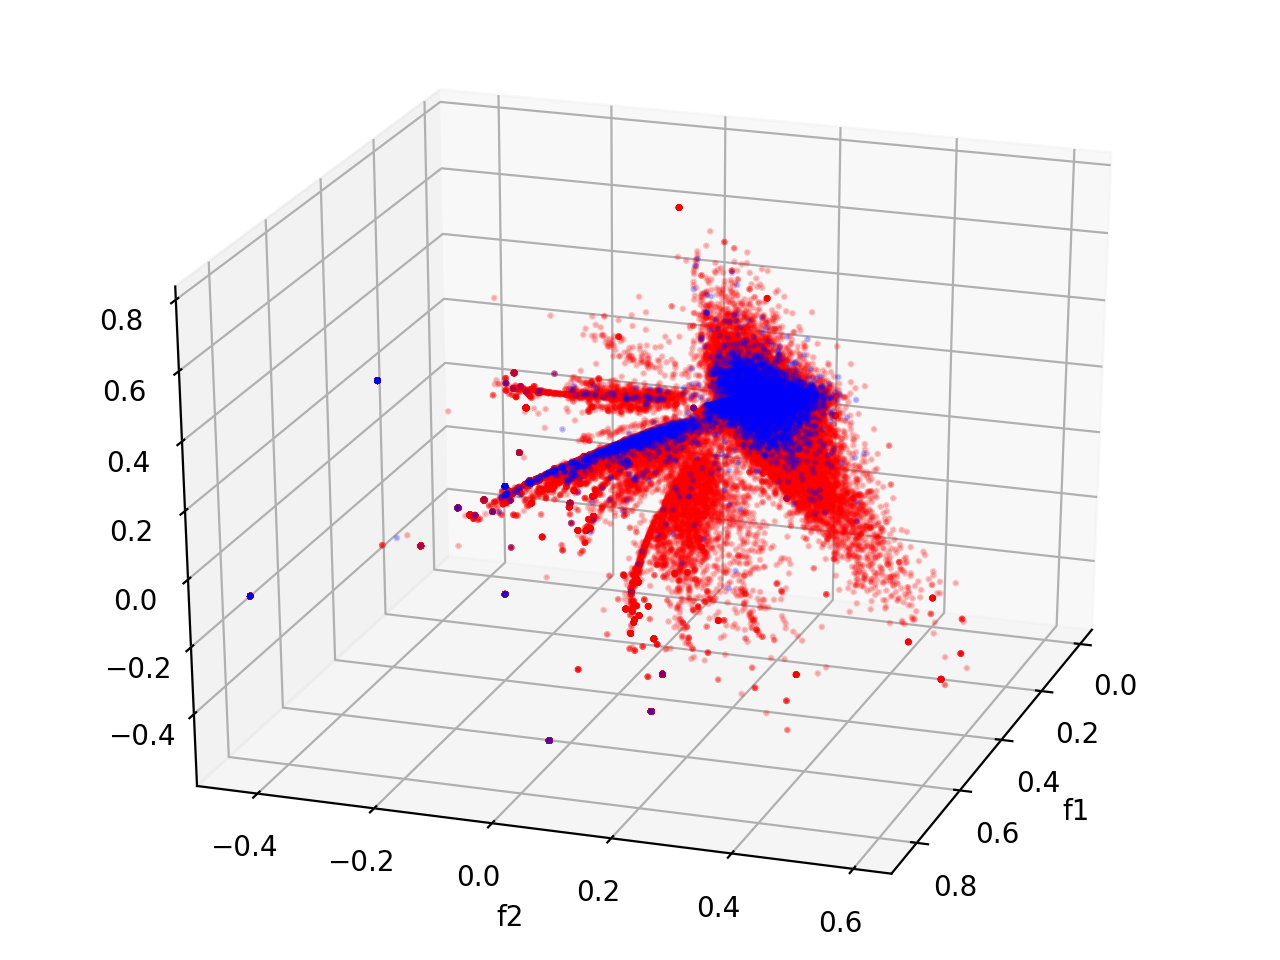

In [15]:
%matplotlib notebook

from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=3)
dec = svd.fit_transform(X_train)
a, b, c, d, e, f = getarr(dec, y_train.values.tolist())
fig=plt.figure()
ax = Axes3D(fig)
ax.scatter(a, b, e, color='r', alpha=0.2, s=2)
ax.scatter(c, d, f, color='b', alpha=0.2, s=2)
ax.set_xlabel('f1')
ax.set_ylabel('f2')

plt.show()




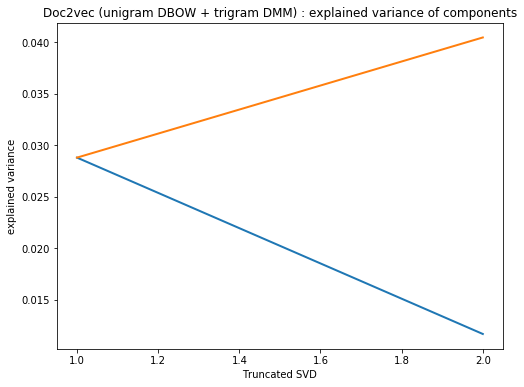

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, 2+1)
ax.plot(x_values, svd.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(svd.explained_variance_ratio_), lw=2, label='cumulative explained variance')
ax.set_title('Doc2vec (unigram DBOW + trigram DMM) : explained variance of components')
ax.set_xlabel('Truncated SVD')
ax.set_ylabel('explained variance')
plt.show()

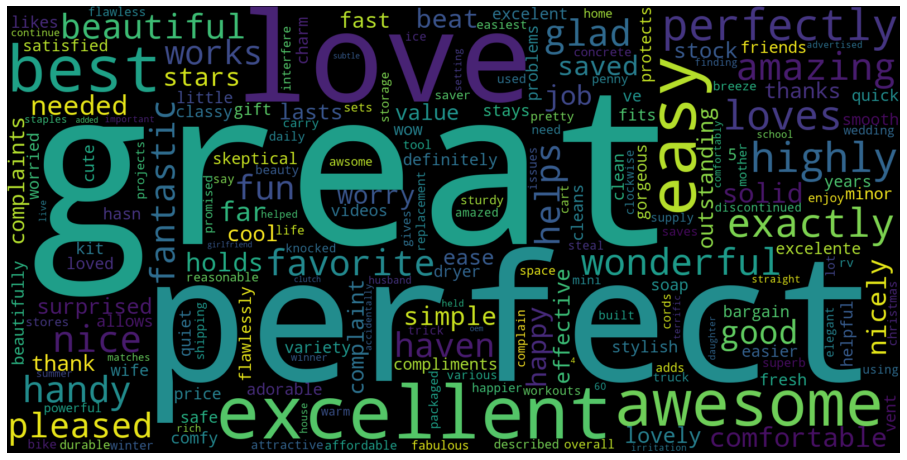

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def wordcloud(coef, features):
    dict={}
    for i in range(len(features.columns)):
        dict[features.columns[i]] = coef[0][i]

    wordcloud = WordCloud(width = 1600, height = 800)
    wordcloud.generate_from_frequencies(frequencies=dict)
    plt.figure(figsize = (16, 16))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
wordcloud(clf.coef_, data2)

Text(0.5, 0, '$\\chi^2$')

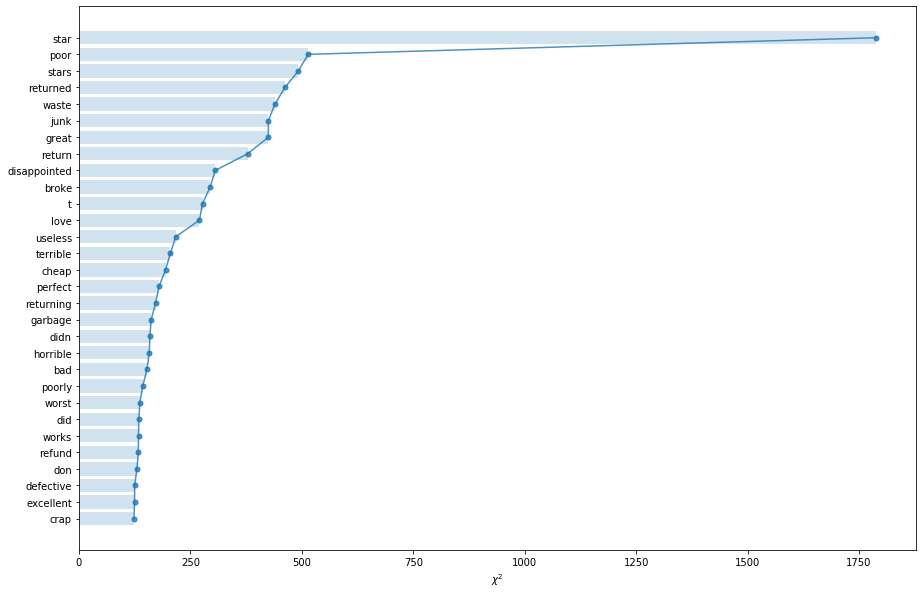

In [20]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer

chi2score = chi2(X_train, y_train)[0]

plt.figure(figsize=(15,10))
wscores = zip(data2, chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-30:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

In [10]:
clfM = MultinomialNB().fit(X_train, y_train)
predictM = clfM.predict(X_val)
accuracy_scoreM = metrics.accuracy_score(predictM, y_val)
print('Regular BOW-Multinomial ' + str(accuracy_scoreM * 100))
print(metrics.confusion_matrix(y_val, predictM))

Regular BOW-Multinomial 89.22764227642277
[[ 1645  2067]
 [ 1060 24256]]


In [12]:
#SVM
clfS = LinearSVC(max_iter=10000).fit(X_train, y_train)
predictS = clfS.predict(X_val)
accuracy_scoreS = metrics.accuracy_score(predictS, y_val)
print('Regular BOW-SVM ' + str(accuracy_scoreS * 100))
print(metrics.confusion_matrix(y_val, predictS))

Regular BOW-SVM 89.58591704561113
[[ 2004  1708]
 [ 1315 24001]]
